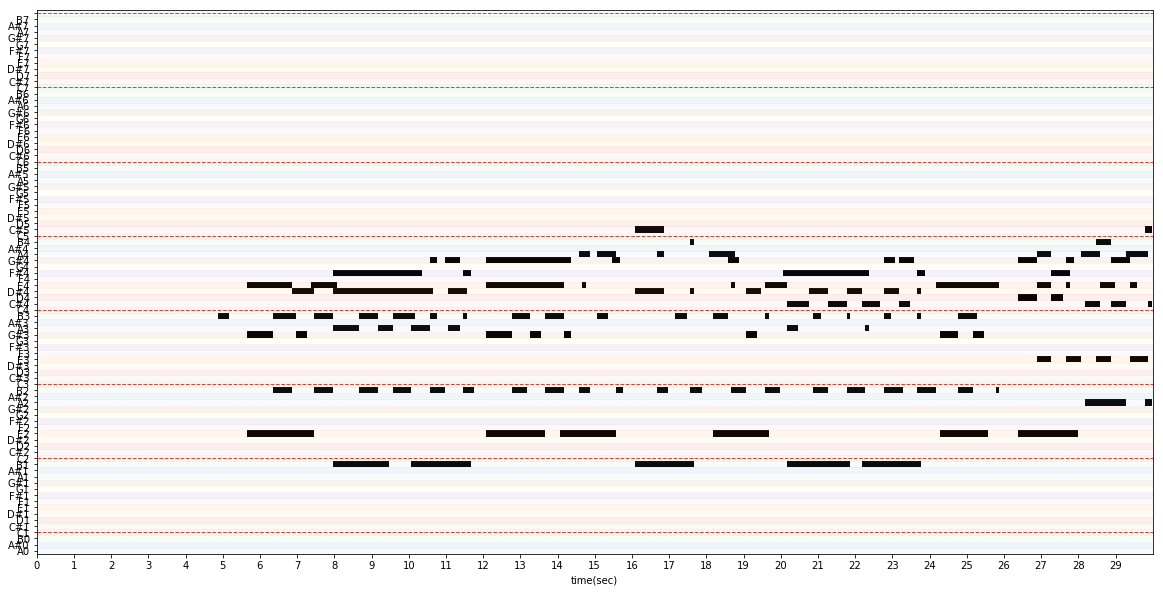

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import midi_utils
import mido
import pretty_midi
import visualize_utils
import matplotlib.pyplot as plt
%matplotlib inline


# MIDI_FILE = "examples/MAPS_MUS-mz_545_3_ENSTDkCl.mid"
# MIDI_FILE = "examples/Yamaha_chopin_10_3.mid"
# MIDI_FILE = "examples/SMD_Chopin_Op010-03_007_20100611-SMD.mid"
MIDI_FILE = "examples/Vienna_Chopin_op10_no3_p01.mid"


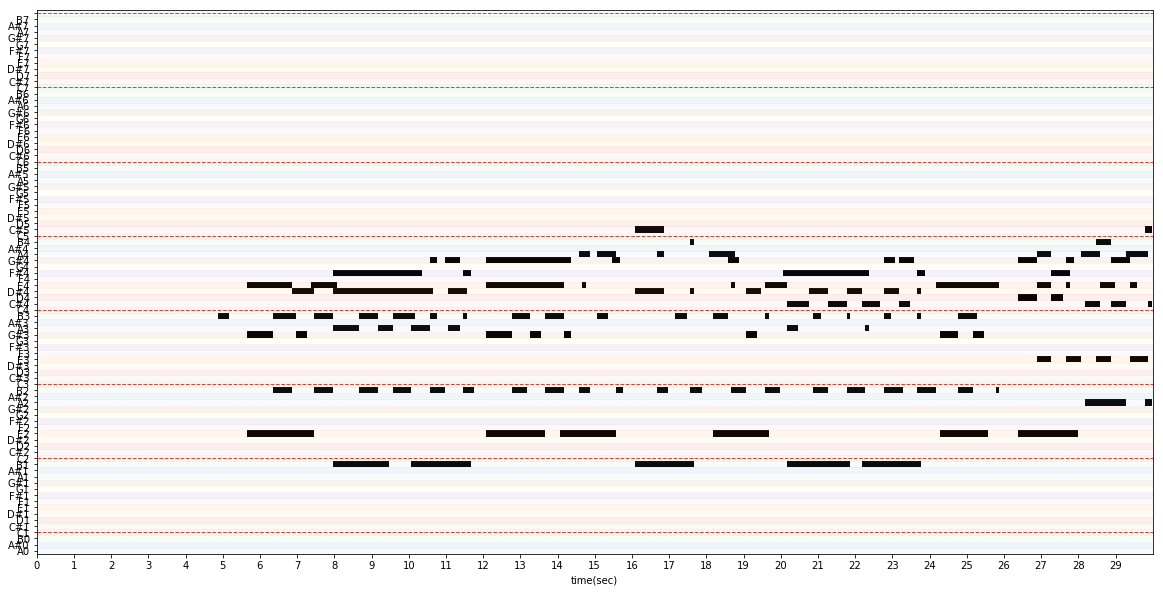

In [2]:
def tick2time(tick, tempo, ticks_per_beat):
  #  convert midi tick to seconds.
  return tick / ticks_per_beat * tempo / 1e6

print('Midi file: {}\n'.format(MIDI_FILE))

#  -------Parse with mido (Low level)--------
midi_data = mido.MidiFile(MIDI_FILE)
print('parse with MIDO:\n {}\n'.format(midi_data))

print('Length: {}\n'.format(midi_data.length))

print('n_tracks: {:d}\n'.format(len(midi_data.tracks)))


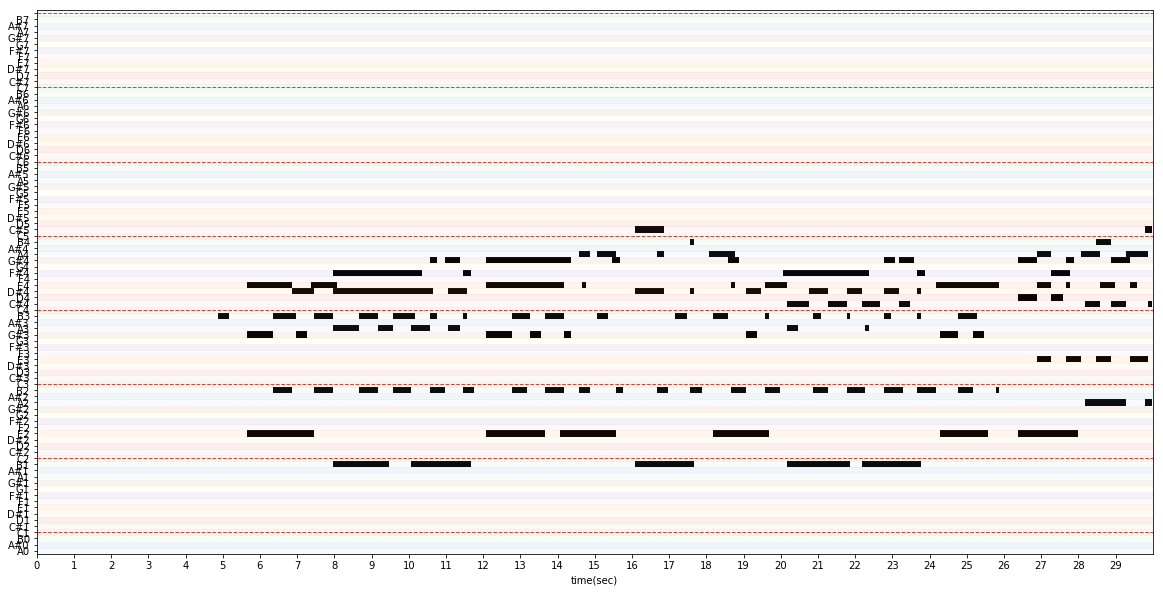

In [3]:
print('Messages(events) in first track:')
for idx, msg in enumerate(midi_data.tracks[0]):
  print('{:d}: {}'.format(idx, msg))

print('\nMessages(events) in second track (first 10)')
for idx, msg in enumerate(midi_data.tracks[1]):
  if idx > 10:
    break
  print('{:d}: {}'.format(idx, msg))


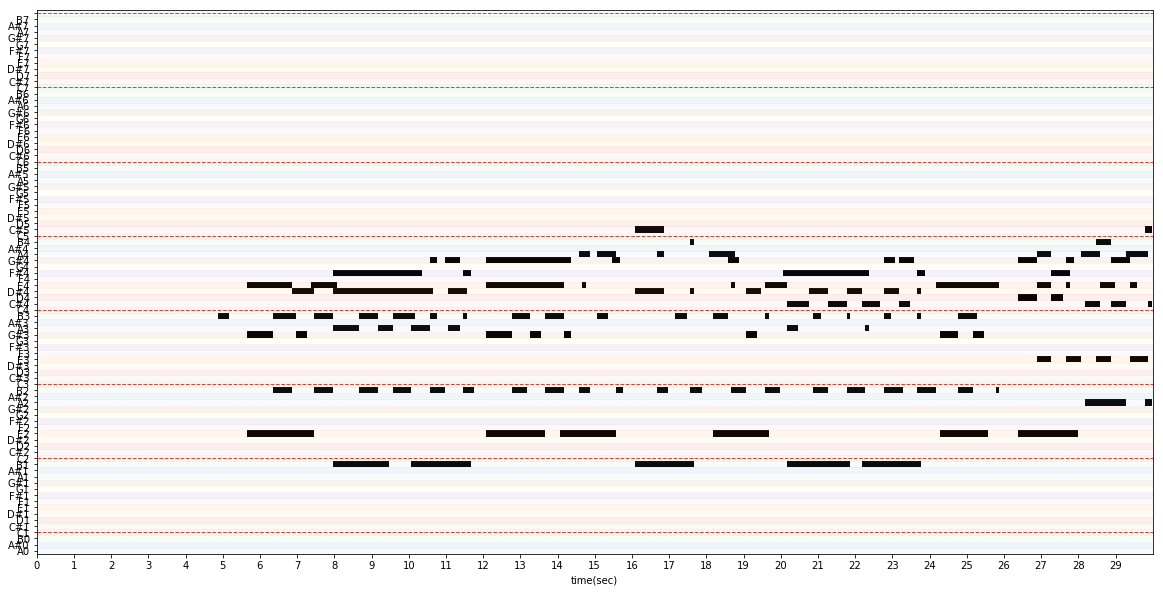

In [4]:
print('\nConvert event time in second track into time(sec)')

try:
  tempo = midi_data.tracks[0][0].tempo  # there can be multiple tempo messages, in different position
except:
  tempo = 5e5  # default value
ticks_per_beat = midi_data.ticks_per_beat

print('Tempo: {:d}, Ticks_per_beats: {:d}. 1000 ticks ~= {:0.4f} seconds\n'.
      format(tempo, ticks_per_beat, tick2time(1000, tempo, ticks_per_beat)))

time_in_sec = 0
for idx, msg in enumerate(midi_data.tracks[1]):
  if idx > 10:
    break
  time_in_sec += tick2time(msg.time, tempo, ticks_per_beat)
  print('{:d}: {}, sec: {:0.4f}'.format(idx, msg, time_in_sec))


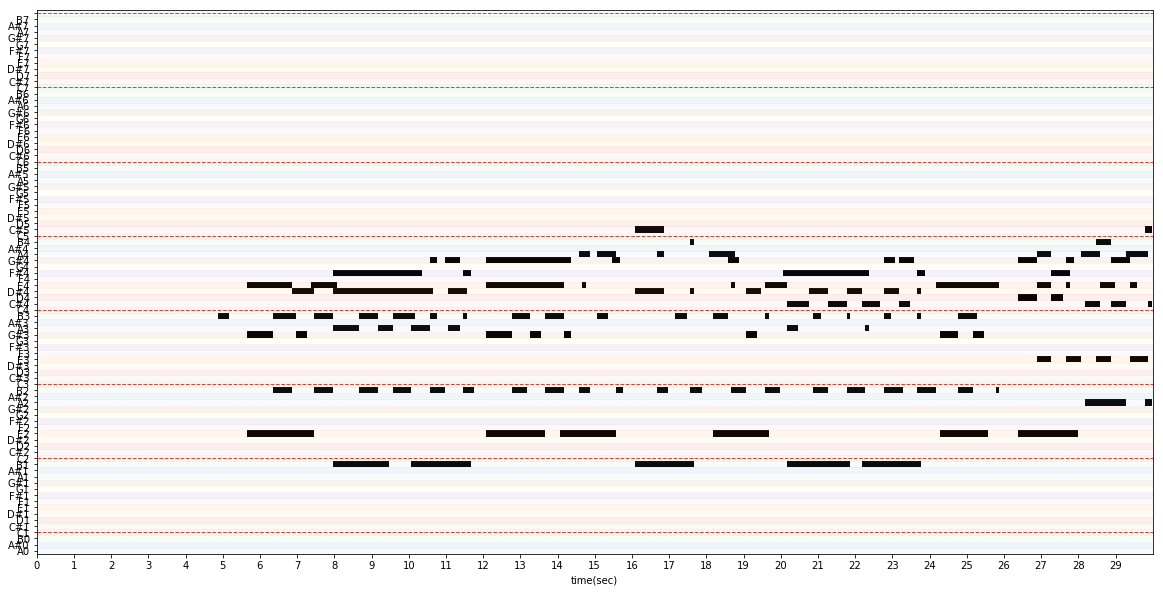

In [5]:
#  -------Parse with pretty_midi (high level)--------
midi_data = pretty_midi.PrettyMIDI(MIDI_FILE)
print('parse with Pretty_midi:\n {}\n'.format(midi_data))

print('Length: {}'.format(midi_data.get_end_time()))
print('Length difference comes from omitting End of Tracks message\n')

print('n_tracks: {:d}'.format(len(midi_data.instruments)))
print('Pretty midi merges events from multiple tracks. checkout the docs for details\n')


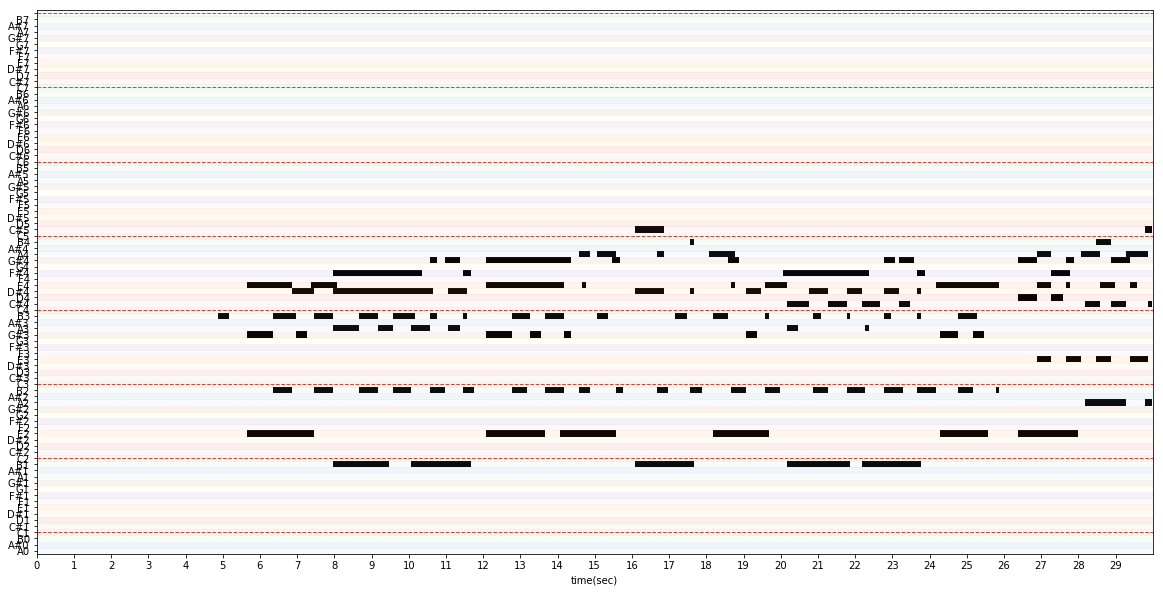

In [6]:
print('Notes in first instruments:')
for idx, msg in enumerate(midi_data.instruments[0].notes):
  if idx > 10:
    break
  print('{:d}: {}'.format(idx, msg))


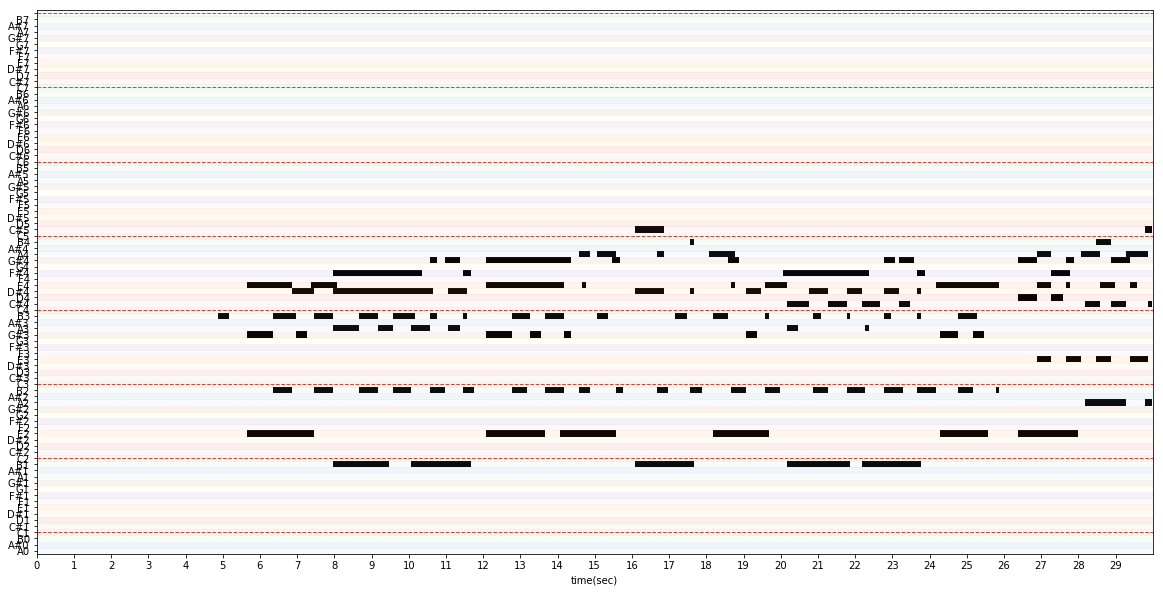

In [9]:
#  -------Draw piano roll------

fps = 10
piano_roll = midi_utils.mid2piano_roll(MIDI_FILE, fps=fps)
plt.figure(figsize=(20, 10))
visualize_utils.draw_piano_roll(piano_roll, draw_range=[0, 300], fps=fps)
